Name : Rushikesh kale     



 Roll_no : ITA640
# Experiment No 4 : Statistical Hypothesis Tests 

In [1]:
import scipy
import numpy as np 
import numpy.random 
import pandas as pd 
import scipy.stats as ss 
import seaborn as sns 
sns.set_style("whitegrid") 


In [2]:
df = pd. read_csv("mobile_price.csv") 
df.head (5) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df['BMI'] = (df['px_width']/(df['px_height']*df['px_height']))*10000 
df.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,BMI
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,18900.000000
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,24.272763
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,10.757481
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,12.078536
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,8.305557


In [4]:
df.replace(0, np.nan, inplace=True)

In [5]:
df.dropna (inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True) 
df.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,BMI
0,1448,1.0,0.5,1.0,6.0,1.0,45,0.8,138,7,...,1724,3378,13,11.0,2,1.0,1.0,1.0,3.0,53.062481
1,1127,1.0,2.9,1.0,5.0,1.0,57,0.8,163,1,...,1049,2048,11,5.0,17,1.0,1.0,1.0,1.0,12.180904
2,1481,1.0,0.7,1.0,4.0,1.0,37,0.6,96,5,...,1533,2945,10,5.0,16,1.0,1.0,1.0,2.0,1139.268728
3,625,1.0,1.2,1.0,5.0,1.0,10,0.2,183,4,...,842,3323,9,1.0,7,1.0,1.0,1.0,2.0,20.881642
4,1490,1.0,0.5,1.0,4.0,1.0,64,0.3,150,8,...,1464,3600,17,9.0,7,1.0,1.0,1.0,3.0,7.291240


# shapiro Test

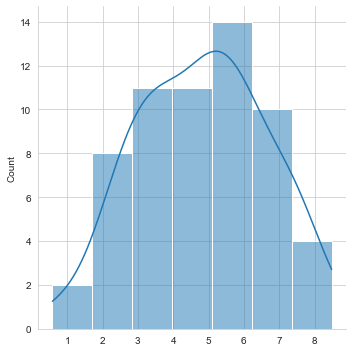

In [7]:
normalized_series=numpy.random.normal(loc=5, scale=2,size=60)
scipy.stats.shapiro(normalized_series) 
sns.displot(normalized_series, kde=True) 

# NORMAL TEST

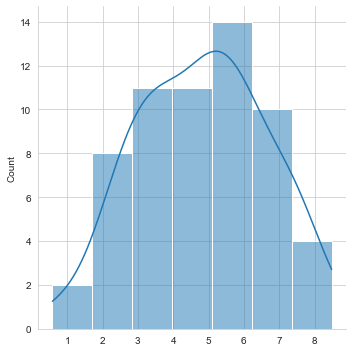

In [8]:
scipy.stats.normaltest(normalized_series) 
sns.displot(normalized_series, kde=True) 

# Anderson test 

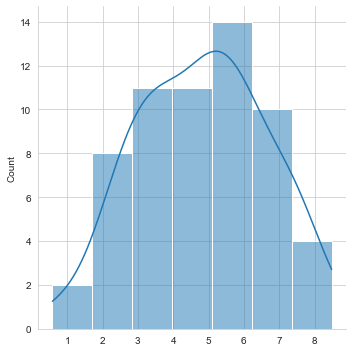

In [9]:
scipy.stats.anderson(normalized_series) 
sns.displot(normalized_series, kde=True) 


# Correlation 

 Pearson correlation test

In [10]:
corr = np.corrcoef(df['BMI'],df['px_width']) 
pd. DataFrame (corr) 


,0,1
0,1.00000,0.26818
1,0.26818,1.00000


Spearman correlation test 

In [11]:
scipy.stats.spearmanr(df[ 'BMI'],df['px_width']) 


SpearmanrResult(correlation=-0.004597269830204984, pvalue=0.9775394744823147)

Kendal rank correlation 

In [12]:
scipy.stats.kendalltau(df['BMI'],df['px_width']) 

KendalltauResult(correlation=-0.039820240903987336, pvalue=0.7179083534902551)

chi square test 

In [13]:
contingency_table=pd.crosstab(index=df['price_range'], columns=df['fc'])
contingency_table


fc,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,13.0,14.0,17.0,18.0
price_range,,,,,,,,,,,,,
1.0,4,1,2,2,1,1,1,0,1,1,0,0,0
2.0,0,0,0,1,1,0,0,2,0,0,0,0,0
3.0,6,0,1,4,1,4,3,0,0,0,1,1,1


In [14]:
scipy.stats.chi2_contingency (contingency_table) 

(32.86209029066172,
 0.1070169481204293,
 24,
 array([[3.5 , 0.35, 1.05, 2.45, 1.05, 1.75, 1.4 , 0.7 , 0.35, 0.35, 0.35,
         0.35, 0.35],
        [1.  , 0.1 , 0.3 , 0.7 , 0.3 , 0.5 , 0.4 , 0.2 , 0.1 , 0.1 , 0.1 ,
         0.1 , 0.1 ],
        [5.5 , 0.55, 1.65, 3.85, 1.65, 2.75, 2.2 , 1.1 , 0.55, 0.55, 0.55,
         0.55, 0.55]]))

# Parametric Tests 

1.Student ttest 

In [15]:
m1 = df['BMI'] 
m2 = df['px_width'] 
ss.ttest_ind (m1, m2, equal_var=True, nan_policy='omit') 

Ttest_indResult(statistic=0.813763833549501, pvalue=0.4182575538991735)

In [16]:
# Equal mean 
n1=np.array([0,1,2,3,4,5,6,7,8,9,10]) 
n2=np.array([0,1,2,3,4,5,6,7,8,9,10]) 
ss.ttest_ind(n1, n2, equal_var=True, nan_policy='omit') 
# since p_value is greater than 0.05 null hypo accepted 

Ttest_indResult(statistic=0.0, pvalue=1.0)

2. Paired Student's ttest

In [17]:
# different set of students 
df1=pd.DataFrame({ "IA1":[10, 20,16,13,19,11,17], "IA2":[7,5,10,8,2,0,0]}) 
ss.ttest_rel(df1['IA1'],df1['IA2']) 

Ttest_relResult(statistic=4.708507246020755, pvalue=0.0032969776313850094)

3. Anova test 

In [18]:
 #one-way ANOVA The one-way ANOVA tests the null hypothesis that two or more group 
dfl=pd.DataFrame({ "IA1":[12, 20,14,18,11], "IA2": [18, 17,16,19,8]})
                
m1=df1['IA1'] 
m2=df1['IA2']
ss.f_oneway (m1,m2) 

F_onewayResult(statistic=25.157733537519153, pvalue=0.00030126635025630195)

# Non-Parametric Tests 


1. Mann-Whitney U test 

In [19]:
U1, p = ss.mannwhitneyu(df["px_width"].head(20), df["BMI"].head (20)) 
U1, p 

(394.0, 1.6570792933858787e-07)

2. Wilcoxon Signed Rank test 

In [20]:
d= [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75] 
W, p = ss.wilcoxon(d)
W, p 


(24.0, 0.041259765625)

3. Kruskal Wallis H test 


In [21]:
ss.kruskal(df["px_width"].head(20), df["BMI"] .head (20)) 


KruskalResult(statistic=27.538536585365847, pvalue=1.5399538195797245e-07)